In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('resources/train.csv')

print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [123]:
df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

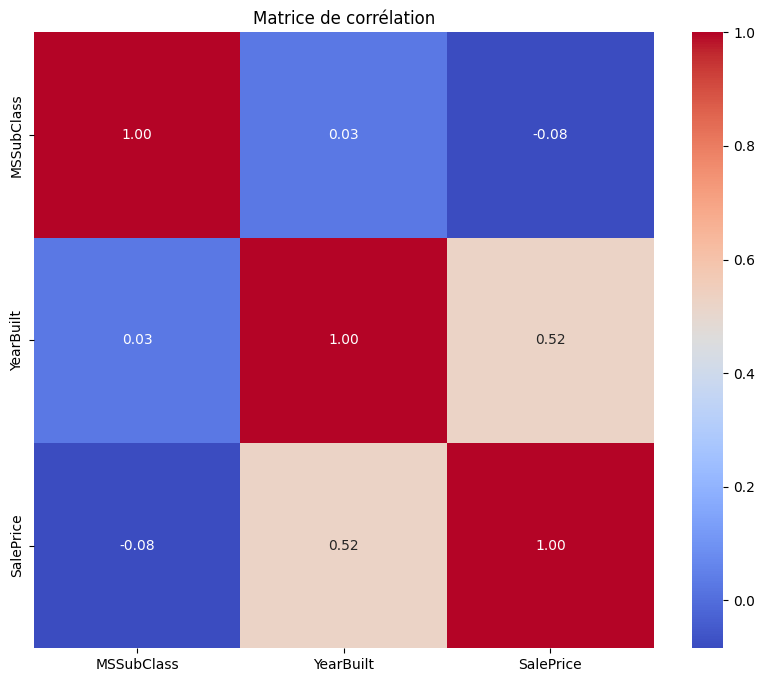

In [121]:
import seaborn as sbn
import matplotlib.pyplot as plt

df_b = df[['MSSubClass','YearBuilt','SalePrice']]

corr = df_b.corr()
plt.figure(figsize=(10, 8))
sbn.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [11]:
print(df.isna().sum())
print(df.isna().sum().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
7481


In [25]:
df.isna().sum().nlargest(81)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
MasVnrArea        0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [31]:
#df = df.ffill()

In [ ]:
# Sélectionner les caractéristiques (X) et la cible (y)

Xord = df[['OverallQual', 'BsmtQual', 'KitchenQual','FireplaceQu','ExterQual']]
Xhot = df[['Neighborhood','LotArea', 'YearBuilt', 'FullBath','Foundation', 'GarageCars','BsmtExposure','GrLivArea', 'TotRmsAbvGrd', '1stFlrSF',  'TotalBsmtSF']]
X = df[['Neighborhood','LotArea','OverallQual', 'YearBuilt', 'FullBath',
        'Foundation', 'BsmtQual', 'KitchenQual', 'GarageCars','FireplaceQu',
        'BsmtExposure','GrLivArea', 'TotRmsAbvGrd', '1stFlrSF', 'ExterQual', 'TotalBsmtSF']]  # Caractéristiques pertinentes pour estimer le prix
y = df['SalePrice']  # Ce que l'on cherche à déterminer

AttributeError: 'csr_matrix' object has no attribute 'info'

In [38]:


one_hot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()
#X = one_hot_encoder.fit_transform(X)
Xhot = one_hot_encoder.fit_transform(Xhot)
Xord = ordinal_encoder.fit_transform(Xord)
X = 

# Séparer les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Créer un modèle RandomForestClassifier
#model = RandomForestClassifier(n_estimators=100, random_state=42)
model = Lasso(max_iter=10000)

# Entraîner le modèle sur les données d'entraînement encodées
model.fit(X_train, y_train)

# Prédire les valeurs sur les données de validation
y_pred = model.predict(X_val)

# Calculer l'exactitude du modèle
#TODO Utiliser RMSE
#Plus on est proche de 1 mieux c'est
#score = model.score(X_val, y_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('RMSE : ',rmse)

mean_percentage_error = (rmse / np.mean(y_val)) * 100
print('Pourcentage d\'erreur : ',mean_percentage_error,'%')

r2 = r2_score(y_val,y_pred)
print('R2 : ',r2)
# scored = score*100
# print('Score : ', "{:.2f}".format(score*100))
# if scored > 80:
#     print('GODLIKE')
# elif 50 < scored <= 80:
#     print('Pas mal !')
# else:
#     print('Tu crains')

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (1460,5)  and requested shape (1460,3576)

In [207]:
# from sklearn.metrics import mean_absolute_error
# import numpy as np
# 
# # Inverse de la transformation des étiquettes
# #y_val_inverse = labelEncoder.inverse_transform(y_val)
# 
# # Calcul de l'erreur absolue moyenne (MAE)
# mae = mean_absolute_error(y_val, y_pred)
# 
# # Calcul de l'erreur en pourcentage
# mean_y_val = np.mean(y_val)
# error_percentage = (mae / mean_y_val) * 100
# 
# print("Erreur absolue moyenne (MAE):", mae)
# print("Erreur en pourcentage:", error_percentage, "%")

Erreur absolue moyenne (MAE): 30206.742143691212
Erreur en pourcentage: 16.51820945217426 %
